In [30]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [5]:
file_0 = './data/sample/0kph.wav'
file_60 = './data/sample/60kph.wav'

In [3]:
def get_wave(path) :
    data, sr = librosa.load(path)
    return data, sr

In [7]:
data_0, sr_0 = get_wave(file_0)
data_60, sr_60 = get_wave(file_60)

# Fast Fourier Transform

In [8]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [9]:
FFT_0 = librosa.stft(data_0, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)
FFT_60 = librosa.stft(data_60, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)

In [10]:
print(FFT_0.shape)
print(FFT_60.shape)

(1025, 1498)
(1025, 1307)


In [14]:
print(FFT_0[1000][100])
type(FFT_0[1000][100])

(-0.00017208864+0.0008343667j)


numpy.complex64

# Spectogram

In [18]:
# transfer to magnitute
Specto_0 = np.abs(FFT_0) ** 2
Specto_60 = np.abs(FFT_60) ** 2

In [21]:
print(Specto_0.shape)
print(Specto_60.shape)

(1025, 1498)
(1025, 1307)


In [19]:
print(Specto_0[1000][100])
type(Specto_0[1000][100])

7.2578234e-07


numpy.float32

# Visualizing Spectogram

In [28]:
def plot_spectogram(Y, sr, hop_length, y_axis = 'linear') :
    plt.figure(figsize = (25, 10)) 
    librosa.display.specshow(Y, 
                            sr = sr,
                            hop_length = hop_length,
                            x_axis = "time",
                            y_axis = y_axis)
    plt.colorbar(format = "%+2.f")

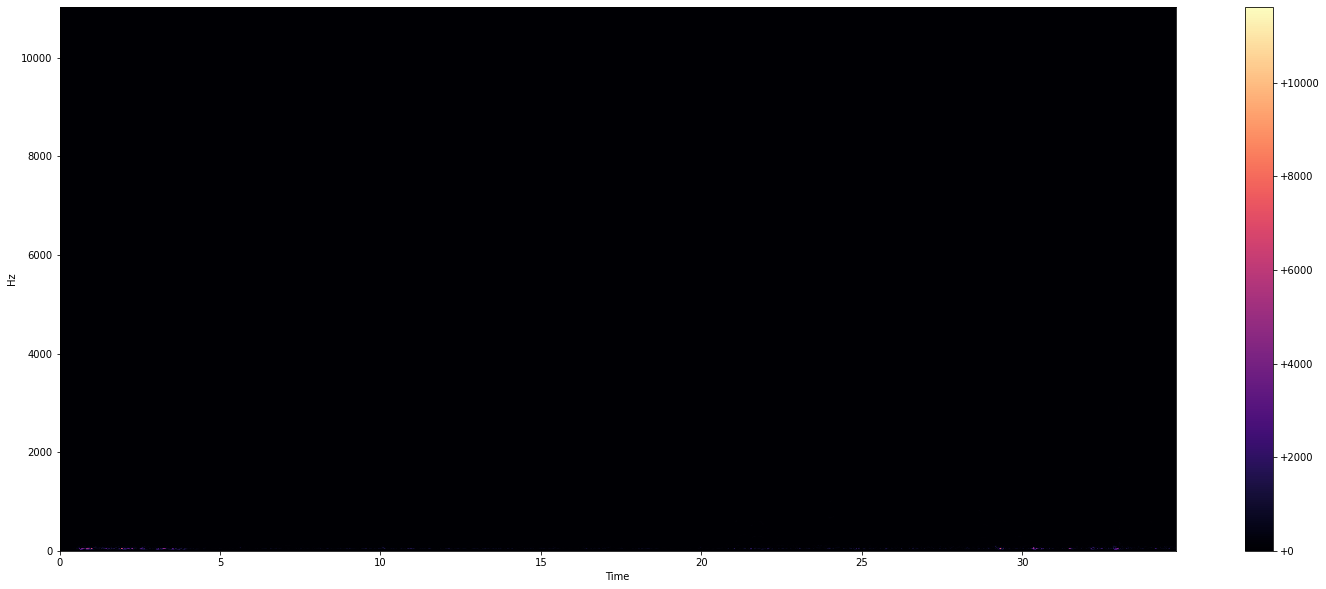

In [39]:
plot_spectogram(Specto_0, sr_0, HOP_SIZE)

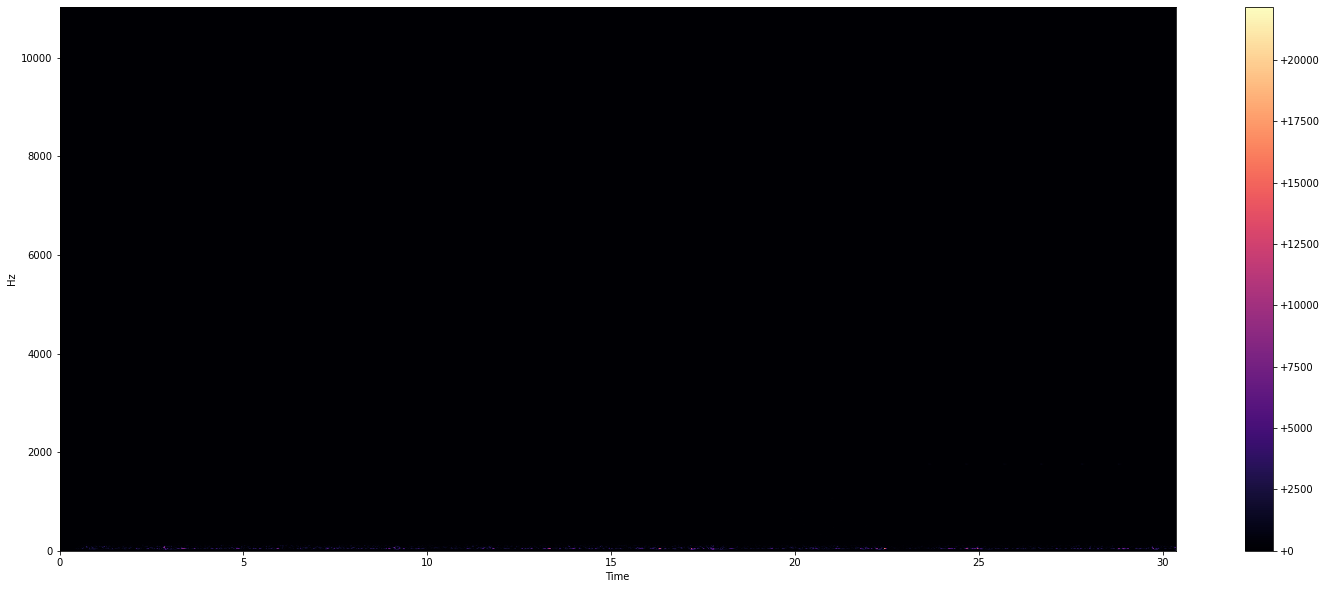

In [40]:
plot_spectogram(Specto_60, sr_60, HOP_SIZE)

# Log-Amplitude Spectogram

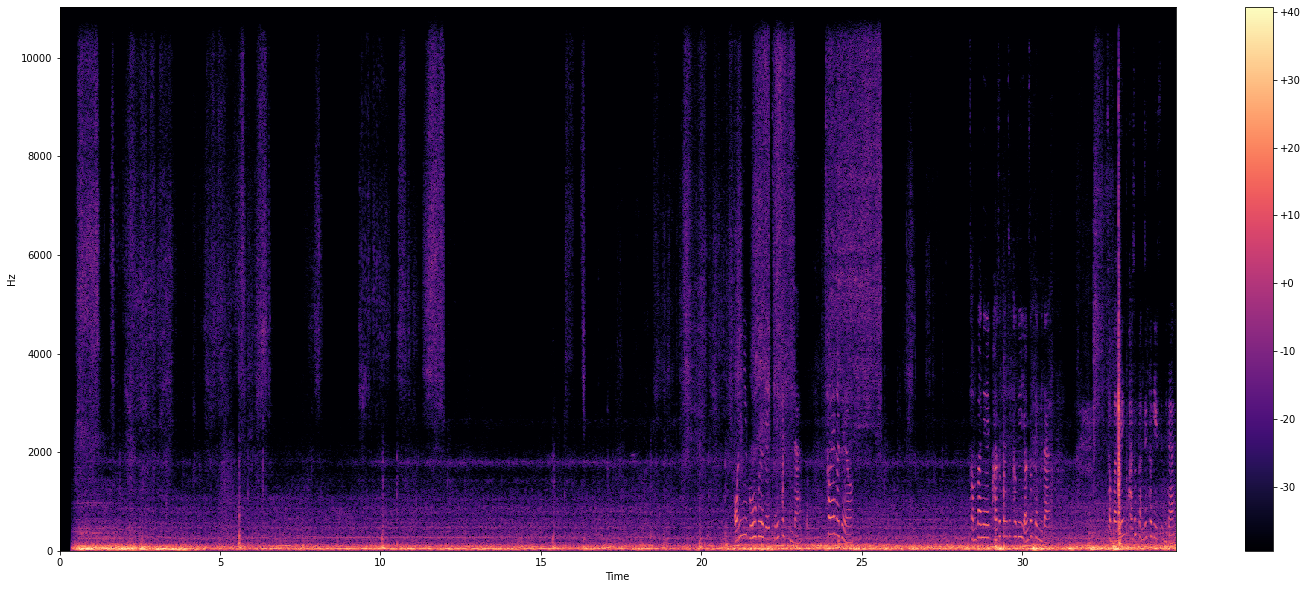

In [41]:
log_scale_0 = librosa.power_to_db(Specto_0)
plot_spectogram(log_scale_0, sr_0, HOP_SIZE)

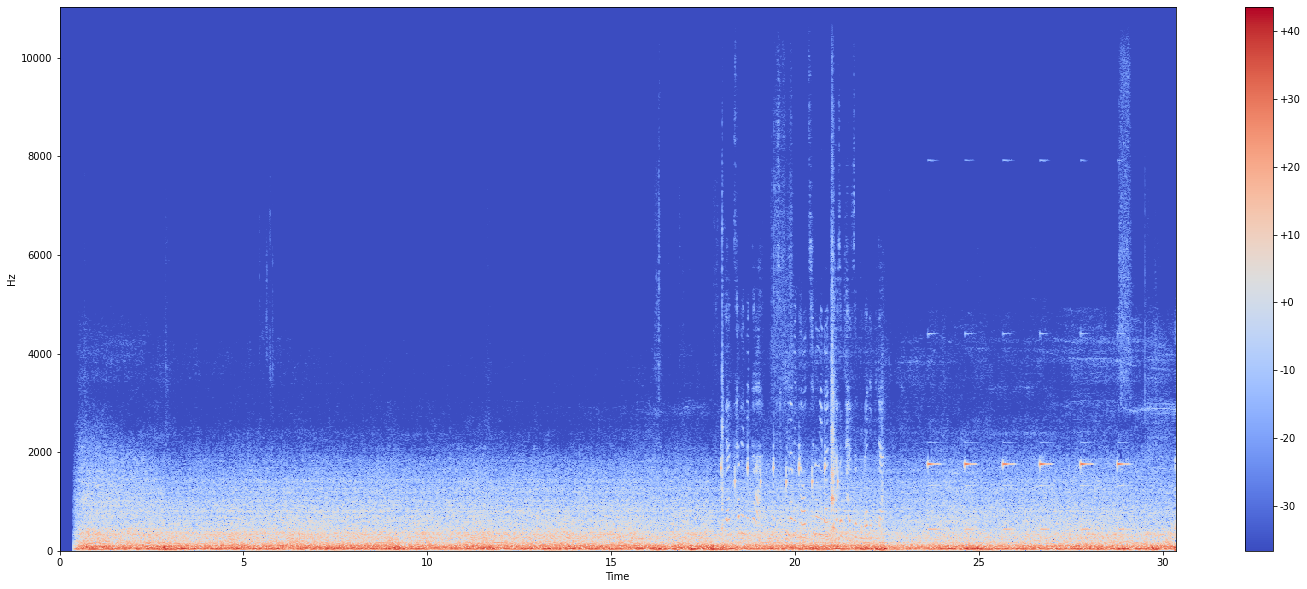

In [42]:
log_scale_60 = librosa.power_to_db(Specto_60)
plot_spectogram(log_scale_60, sr_60, HOP_SIZE)

# Log-Frequency Spectogram

C:\envs\audio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\envs\audio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\envs\audio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


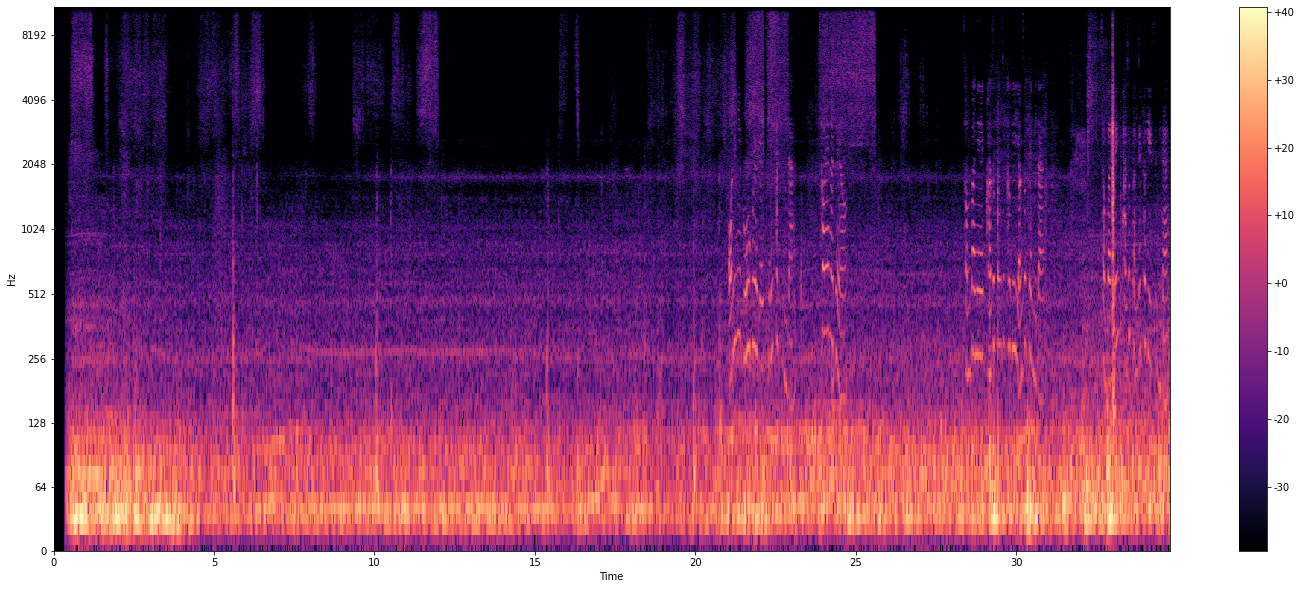

In [43]:
plot_spectogram(log_scale_0, sr_0, HOP_SIZE, y_axis = "log")

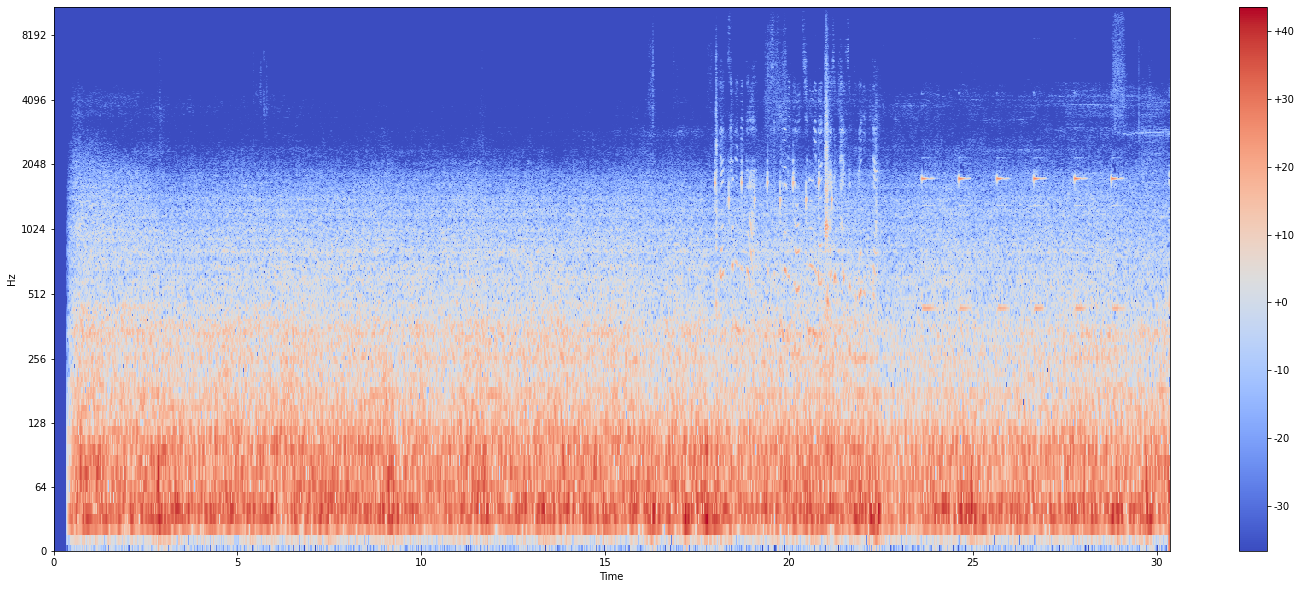

In [44]:
plot_spectogram(log_scale_60, sr_60, HOP_SIZE, y_axis = "log")

In [46]:
log_scale_60.shape

(1025, 1307)